<a href="https://colab.research.google.com/github/OmarAlsaqa/BloodCancer/blob/master/BloodCancer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

%matplotlib inline

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

import itertools

import keras
from keras import utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers import *
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import activations
from keras.regularizers import l2
from keras.engine.topology import get_source_inputs



import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


In [0]:
import joblib

X = joblib.load('/content/drive/My Drive/Colab Notebooks/XCan224.joblib')
y = joblib.load('/content/drive/My Drive/Colab Notebooks/yCan224.joblib')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [0]:
del X, y

In [0]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

# Normalization
x_train = (x_train - np.mean(x_train))/np.std(x_train)
x_test = (x_test - np.mean(x_test))/np.std(x_test)

# Label Encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Reshape images in 3 dimensions
x_train = x_train.reshape(x_train.shape[0], *(224, 224, 3))
x_test = x_test.reshape(x_test.shape[0], *(224, 224, 3))

In [0]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 8528
number of test examples = 2133
X_train shape: (8528, 224, 224, 3)
Y_train shape: (8528, 2)
X_test shape: (2133, 224, 224, 3)
Y_test shape: (2133, 2)


In [0]:
img_height,img_width = 224,224 
num_classes = 2

base_model = applications.vgg19.VGG19(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.95)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
loaded_model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/VGG19Drop9Epoch50Size224_224.h5')
loaded_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
loss, acc = loaded_model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

2133/2133 [==============================] - 16s 7ms/step
Restored model, accuracy: 89.31%


In [0]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = loaded_model.fit(x_train, y_train, validation_split=0.25, epochs = 25, batch_size = 32)

Train on 6396 samples, validate on 2132 samples
Epoch 1/25
6396/6396 [==============================] - 66s 10ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.4778 - val_accuracy: 0.9099
Epoch 2/25
6396/6396 [==============================] - 64s 10ms/step - loss: 0.0248 - accuracy: 0.9914 - val_loss: 0.5309 - val_accuracy: 0.9240
Epoch 3/25
6396/6396 [==============================] - 64s 10ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.6602 - val_accuracy: 0.9217
Epoch 4/25
6396/6396 [==============================] - 64s 10ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.3888 - val_accuracy: 0.9062
Epoch 5/25
6396/6396 [==============================] - 64s 10ms/step - loss: 0.0246 - accuracy: 0.9916 - val_loss: 0.4970 - val_accuracy: 0.9226
Epoch 6/25
6396/6396 [==============================] - 64s 10ms/step - loss: 0.0526 - accuracy: 0.9847 - val_loss: 0.4874 - val_accuracy: 0.9029
Epoch 7/25
6396/6396 [==============================] - 64s 10ms/step - loss

In [0]:
preds = loaded_model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2133/2133 [==============================] - 7s 3ms/step
Loss = 0.6463938380156692
Test Accuracy = 0.9170182943344116


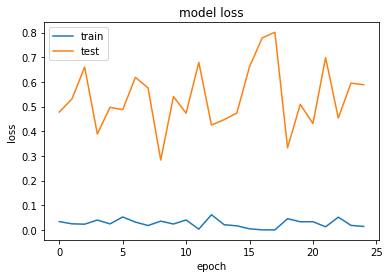

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

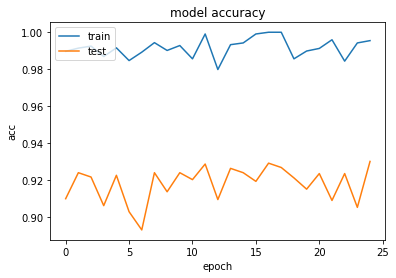

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = loaded_model.predict(x_test)

In [0]:
p = predictions.round()

In [0]:
y_pred = np.argmax(p, axis=1)

In [0]:
newY_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       684
           1       0.93      0.95      0.94      1449

    accuracy                           0.92      2133
   macro avg       0.91      0.90      0.90      2133
weighted avg       0.92      0.92      0.92      2133



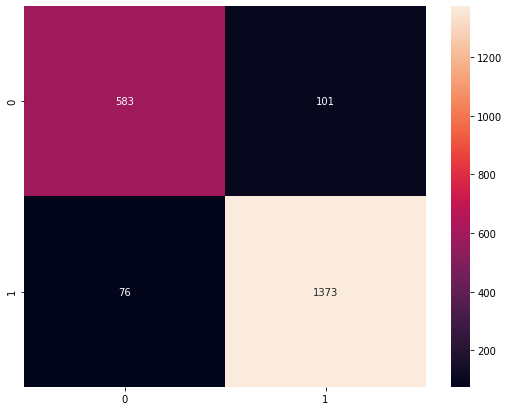

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [0]:
model_name = 'VGG19Drop9Epoch50Size224_224.h5'
save_dir = '/content/drive/My Drive/Colab Notebooks'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/VGG19Drop9Epoch50Size224_224.h5 
